In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Heart_Disease.csv")

print(df.columns)
print(df.head())

Index(['indicatorName', 'indicatorCode', 'year', 'yearCode',
       'ipb-ischemic heart disease', 'ipb-acute myocardial infarction',
       'hpb-heart failure', 'ipm-ischemic heart disease',
       'ipm-acute myocardial infarction', 'hpm-heart failure',
       'ipf-ischemic heart disease', 'ipf-acute myocardial infarction',
       'hpf-heart failure', 'Total'],
      dtype='object')
     indicatorName indicatorCode  year yearCode  ipb-ischemic heart disease  \
0  number of cases           NUM  2000   yr2000                   1526340.0   
1  number of cases           NUM  2001   yr2001                   1644800.0   
2  number of cases           NUM  2002   yr2002                   1747830.0   
3  number of cases           NUM  2003   yr2003                   1839400.0   
4  number of cases           NUM  2004   yr2004                   1920150.0   

   ipb-acute myocardial infarction  hpb-heart failure  \
0                         251560.0           467710.0   
1                        

In [2]:
cases = df.loc[df["indicatorName"]=="number of cases",df.columns[2:]]
deaths = df.loc[df["indicatorName"]=="number of deaths",df.columns[2:]]

print(cases.columns)

#print(cases[["year", "Total"]])
#print(deaths[["year", "Total"]])

isch_cases = cases.iloc[:, 2:9:3].sum(axis=1)
myo_cases = cases.iloc[:, 3:10:3].sum(axis=1)
hf_cases = cases.iloc[:, 4:11:3].sum(axis=1)
comb_cases = [isch_cases.sum(), myo_cases.sum(), hf_cases.sum()]

isch_deaths = deaths.iloc[:, 2:9:3].sum(axis=1)
#print(isch_cases.sum())
myo_deaths = deaths.iloc[:, 3:10:3].sum(axis=1)
hf_deaths = deaths.iloc[:, 4:11:3].sum(axis=1)
comb_deaths = [isch_deaths.sum(), myo_deaths.sum(), hf_deaths.sum()]
#print(isch_cases)
#print(isch_deaths)

Index(['year', 'yearCode', 'ipb-ischemic heart disease',
       'ipb-acute myocardial infarction', 'hpb-heart failure',
       'ipm-ischemic heart disease', 'ipm-acute myocardial infarction',
       'hpm-heart failure', 'ipf-ischemic heart disease',
       'ipf-acute myocardial infarction', 'hpf-heart failure', 'Total'],
      dtype='object')


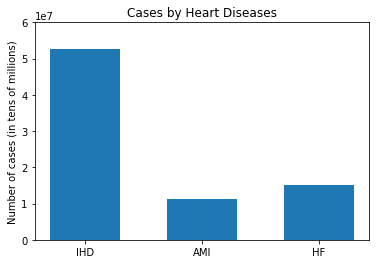

In [6]:
# Total cases by disease
ticks = range(1, 4)
height = comb_cases
tick_label = ["IHD", "AMI", "HF"]
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Cases by Heart Diseases")
plt.ylabel("Number of cases (in tens of millions)")
plt.ylim([0,60000000])
plt.show()

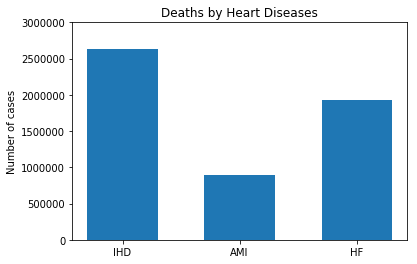

In [7]:
# total mortalities by disease
ticks = range(1, 4)
height = comb_deaths
tick_label = ["IHD", "AMI", "HF"]
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Deaths by Heart Diseases")
plt.ylabel("Number of cases")
plt.ylim([0,3000000])
plt.show()

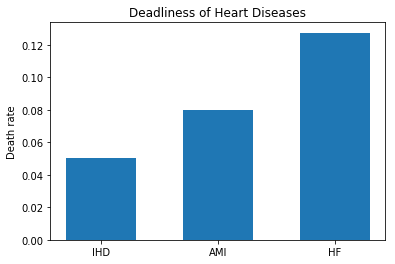

In [5]:
# total mortality rates of each disease
ticks = range(1, 4)
height = [isch_deaths.sum()/isch_cases.sum(), myo_deaths.sum()/myo_cases.sum(), hf_deaths.sum()/hf_cases.sum()]
tick_label = ["IHD", "AMI", "HF"]
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Deadliness of Heart Diseases")
plt.ylabel("Death rate")
plt.show()

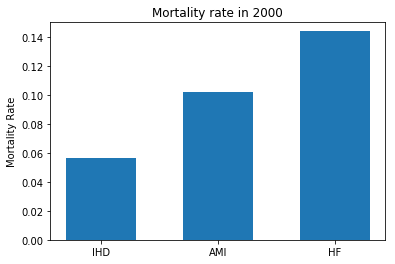

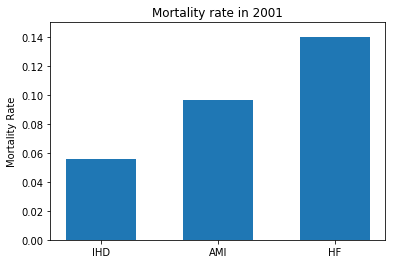

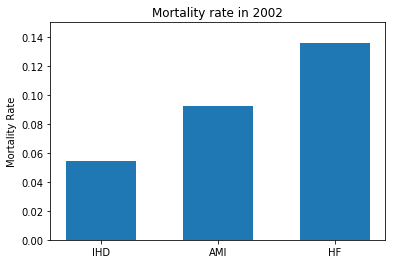

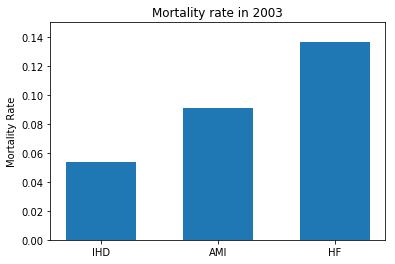

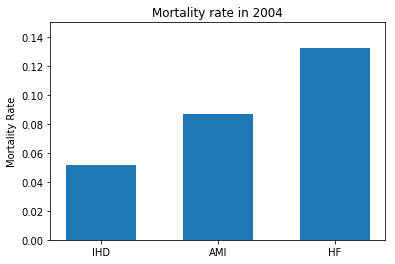

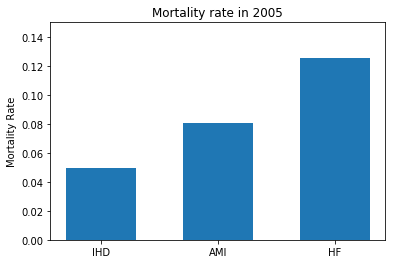

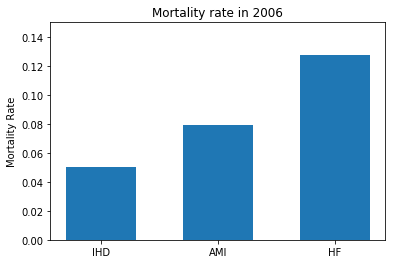

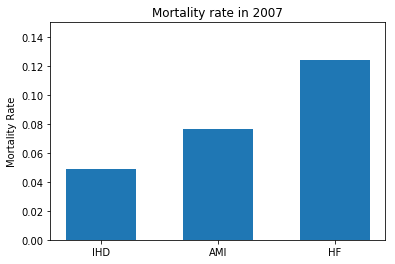

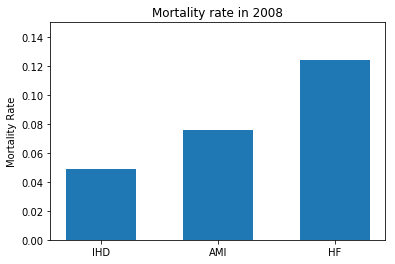

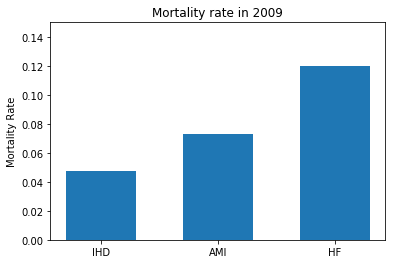

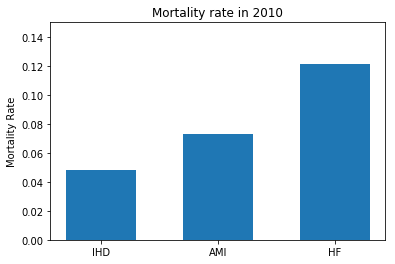

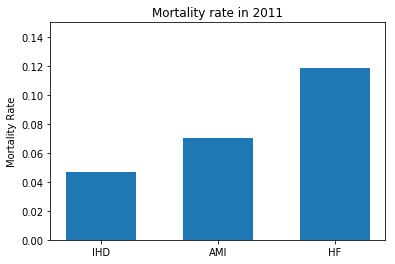

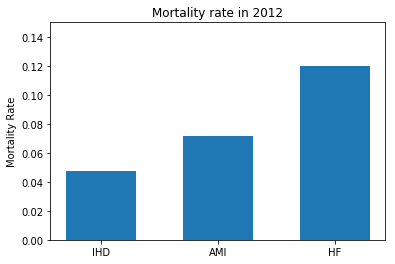

In [8]:
# total mortality rates of each disease by year
for row in range(0,13):
    ticks = range(1, 4)
    height = [isch_deaths[row+39]/isch_cases[row], myo_deaths[row+39]/myo_cases[row], hf_deaths[row+39]/hf_cases[row]]
    tick_label = ["IHD", "AMI", "HF"]
    plt.bar(ticks, height, tick_label=tick_label, width=0.6)
    plt.title("Mortality rate in " + str(cases["year"].values[row]))
    plt.ylabel("Mortality Rate")
    plt.ylim([0,0.15])
    plt.show()

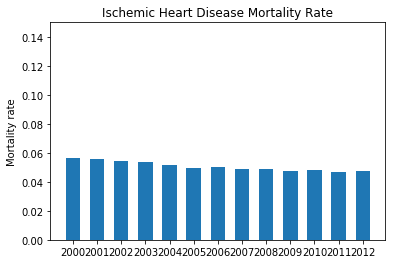

In [9]:
ticks = range(1, 14)
height = isch_deaths.values/isch_cases.values
tick_label = cases["year"].values
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Ischemic Heart Disease Mortality Rate")
plt.ylabel("Mortality rate")
plt.ylim([0,0.15])
plt.show()

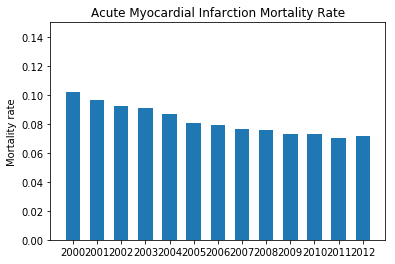

In [10]:
height = myo_deaths.values/myo_cases.values
tick_label = cases["year"].values
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Acute Myocardial Infarction Mortality Rate")
plt.ylabel("Mortality rate")
plt.ylim([0,0.15])
plt.show()

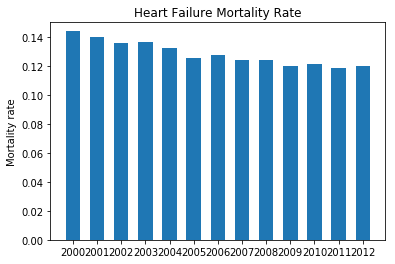

In [11]:
height = hf_deaths.values/hf_cases.values
tick_label = cases["year"].values
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Heart Failure Mortality Rate")
plt.ylabel("Mortality rate")
plt.ylim([0,0.15])
plt.show()

1: ipb-ischemic heart disease
2: ipb-acute myocardial infarction
3: hpb-heart failure
4: ipm-ischemic heart disease
5: ipm-acute myocardial infarction
6: hpm-heart failure
7: ipf-ischemic heart disease
8: ipf-acute myocardial infarction
9: hpf-heart failure


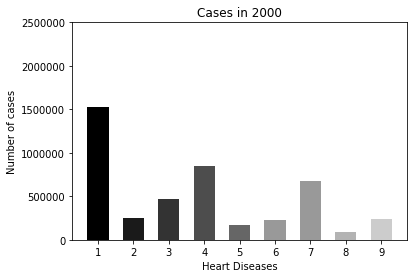

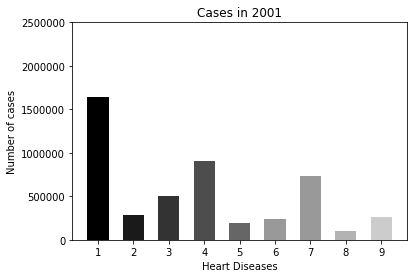

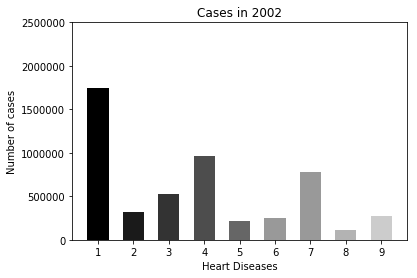

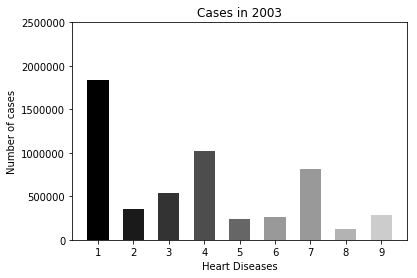

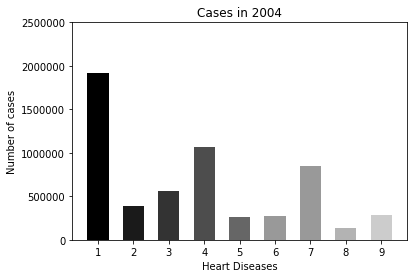

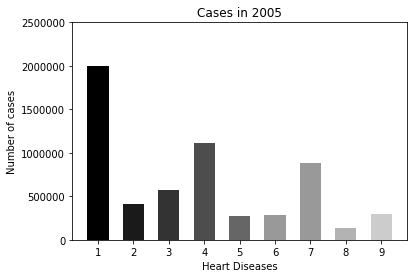

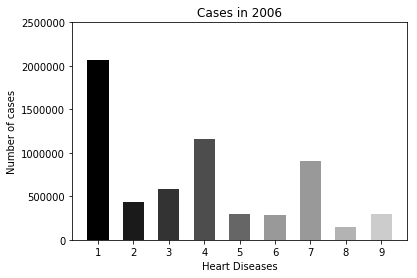

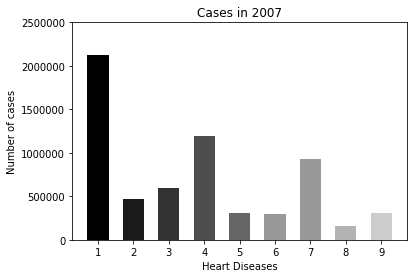

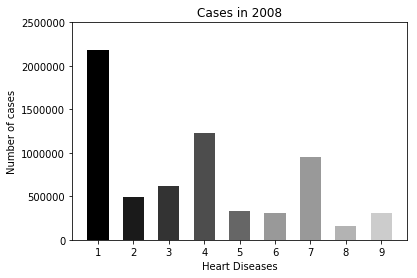

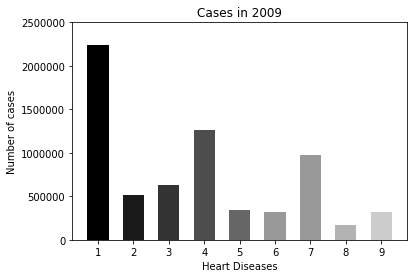

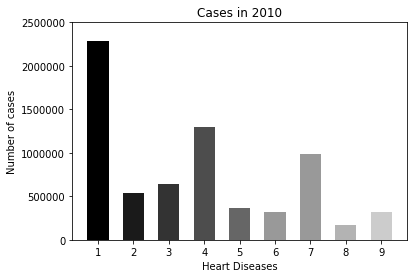

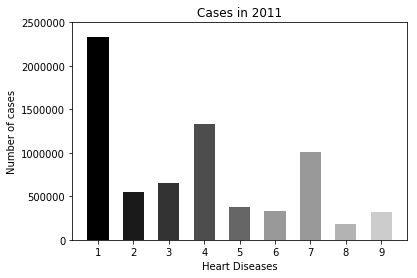

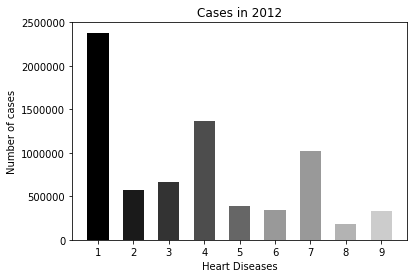

In [12]:
for col in list(cases.columns.values[2:-1]):
    print(str(list(cases.columns.values).index(col)-1) + ": " + col)

#gives graphs cases for each diseases in each year
for row in cases.values:
    ticks = range(1, len(row[2:-1]) + 1)
    height = row[2:-1]
    tick_label = range(1, len(row[2:-1]) + 1)
    plt.bar(ticks, height, tick_label=tick_label, width=0.6, color=['0','0.1','0.2','0.3','0.4','0.6','0.6','0.7','0.8'])
    plt.title("Cases in " + str(row[0]))
    plt.ylabel("Number of cases")
    plt.xlabel("Heart Diseases")
    plt.ylim([0,2500000])
    plt.show()

1: ipb-ischemic heart disease
2: ipb-acute myocardial infarction
3: hpb-heart failure
4: ipm-ischemic heart disease
5: ipm-acute myocardial infarction
6: hpm-heart failure
7: ipf-ischemic heart disease
8: ipf-acute myocardial infarction
9: hpf-heart failure


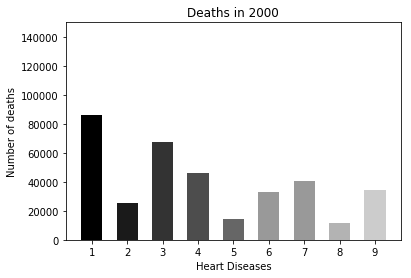

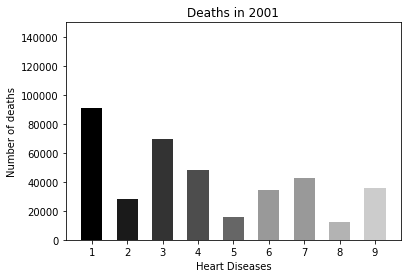

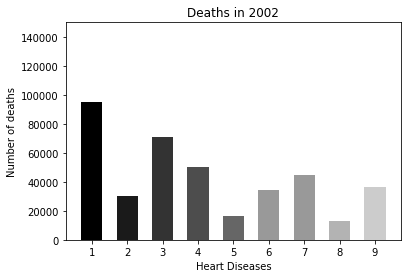

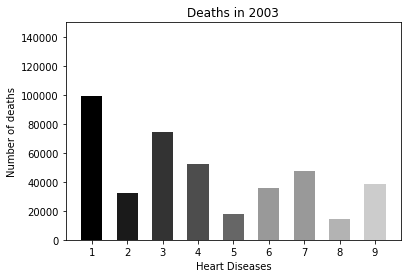

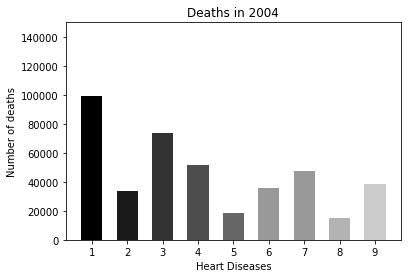

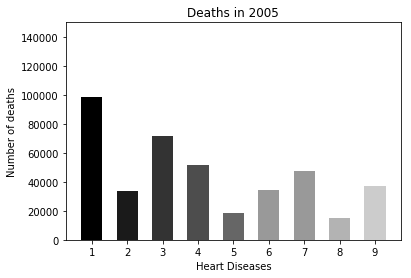

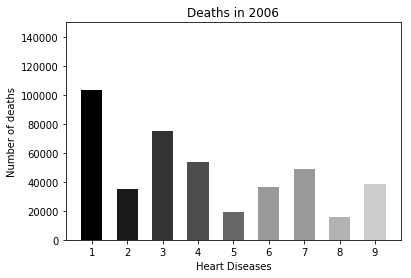

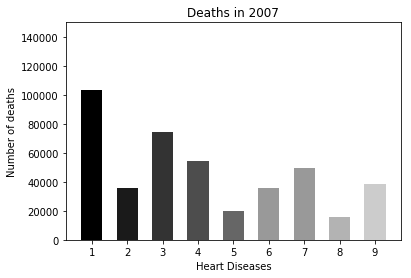

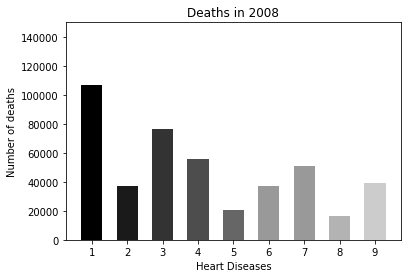

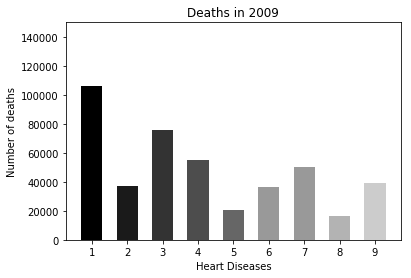

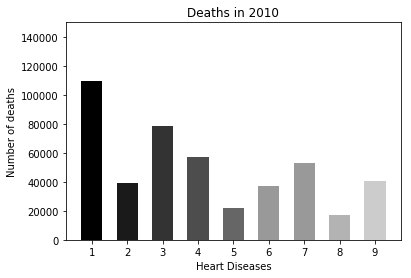

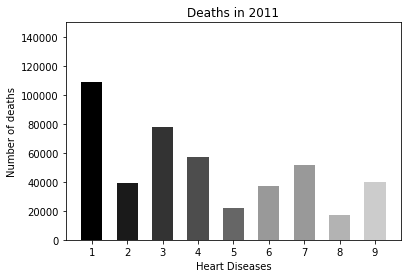

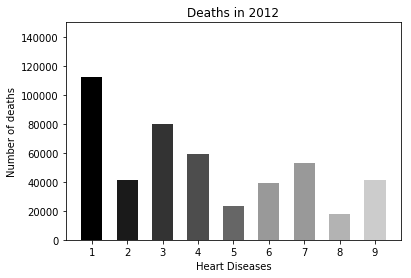

In [14]:
for col in list(cases.columns.values[2:-1]):
    print(str(list(cases.columns.values).index(col)-1) + ": " + col)
    
#gives graphs cases for each diseases in each year
for row in deaths.values:
    ticks = range(1, len(row[2:-1]) + 1)
    height = row[2:-1]
    tick_label = range(1, len(row[2:-1]) + 1)
    plt.bar(ticks, height, tick_label=tick_label, width=0.6, color=['0','0.1','0.2','0.3','0.4','0.6','0.6','0.7','0.8'])
    plt.title("Deaths in " + str(row[0]))
    plt.ylabel("Number of deaths")
    plt.xlabel("Heart Diseases")
    plt.ylim([0, 150000])
    plt.show()

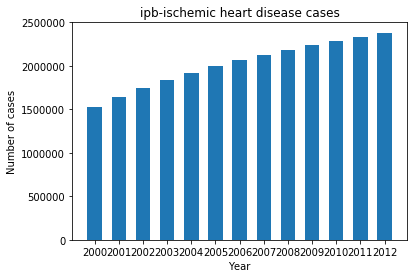

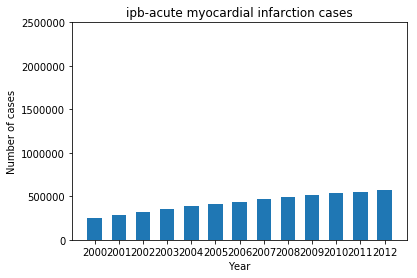

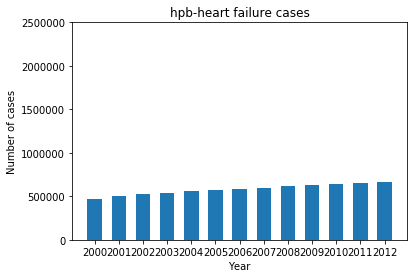

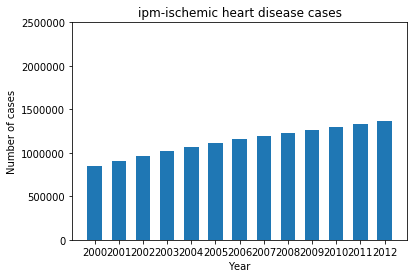

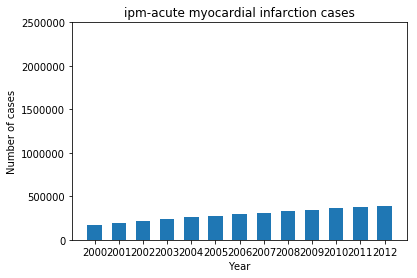

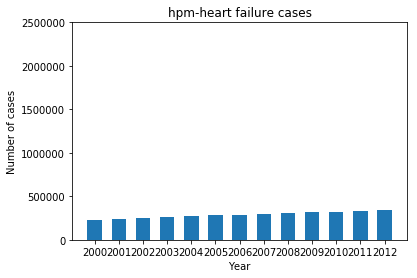

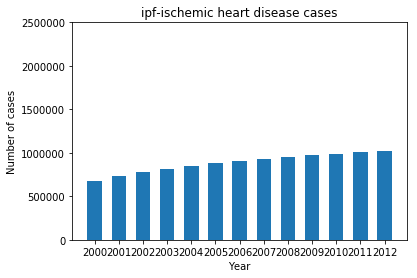

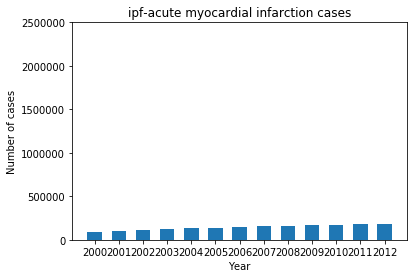

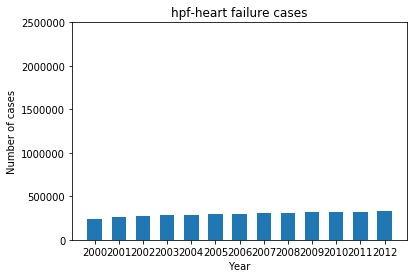

In [15]:
# Cases per disease separated by year
for i in cases.columns[2:-1]:
    j = cases[i].values
    ticks = range(1, len(cases["year"]) + 1)
    height = j
    tick_label = cases["year"].values
    plt.bar(ticks, height, tick_label=tick_label, width=0.6)
    plt.title(i + " cases")
    plt.ylabel("Number of cases")
    plt.xlabel("Year")
    plt.ylim([0,2500000])
    plt.show()

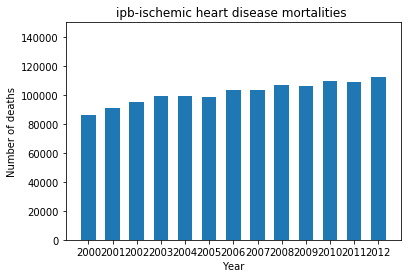

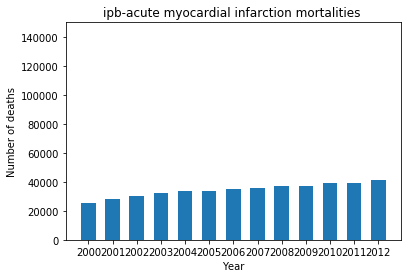

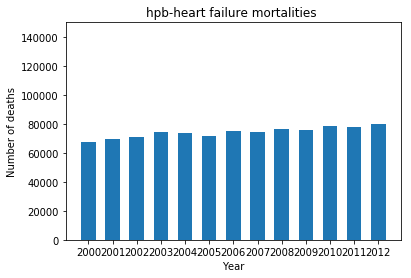

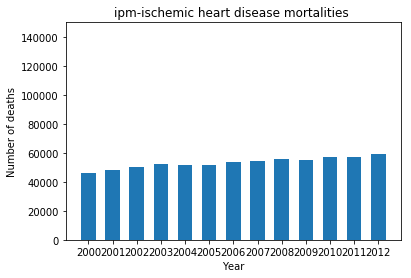

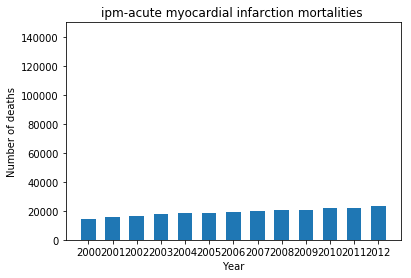

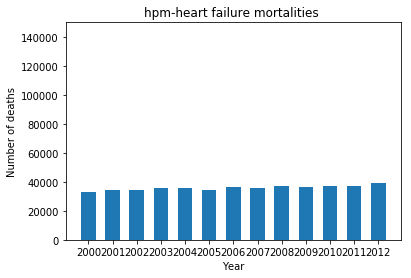

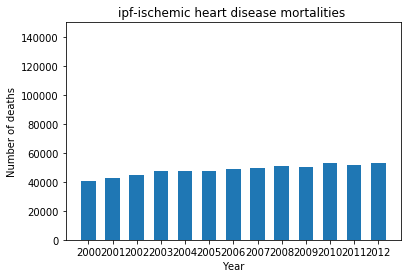

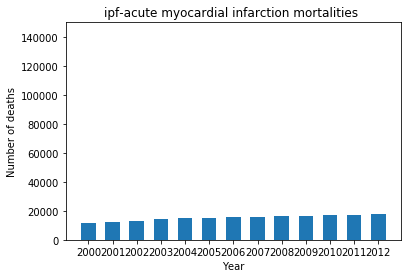

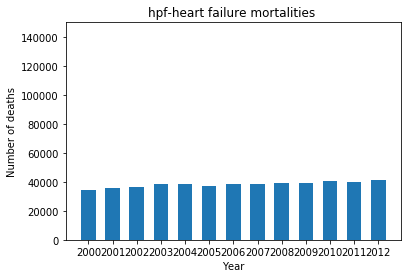

In [16]:
# Deaths per disease separated by year
for i in deaths.columns[2:-1]:
    j = deaths[i].values
    ticks = range(1, len(cases["year"]) + 1)
    height = j
    tick_label = deaths["year"].values
    plt.bar(ticks, height, tick_label=tick_label, width=0.6)
    plt.title(i + " mortalities ")
    plt.ylabel("Number of deaths")
    plt.xlabel("Year")
    plt.ylim([0, 150000])
    plt.show()

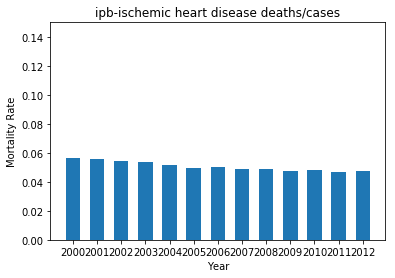

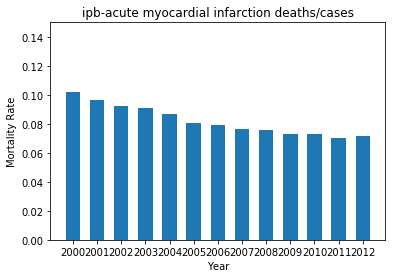

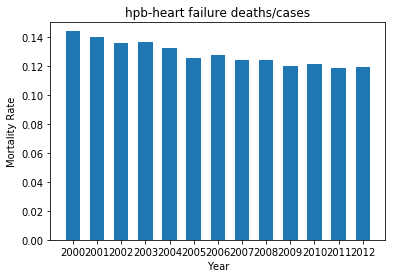

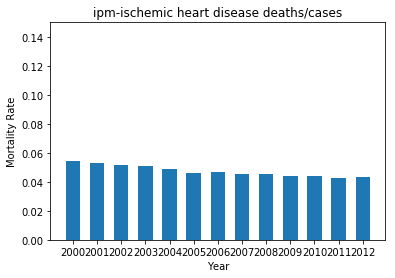

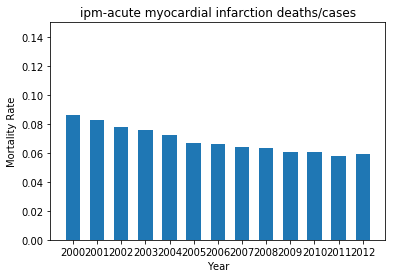

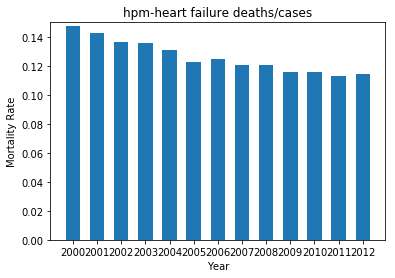

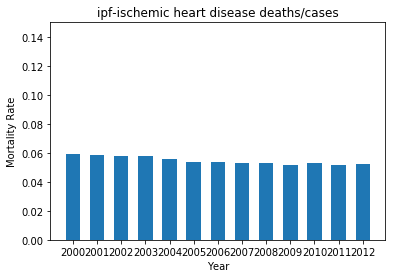

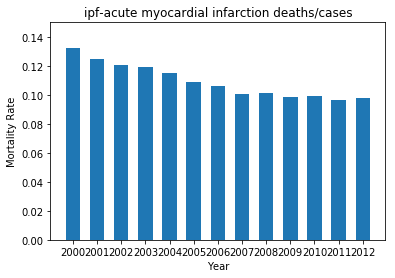

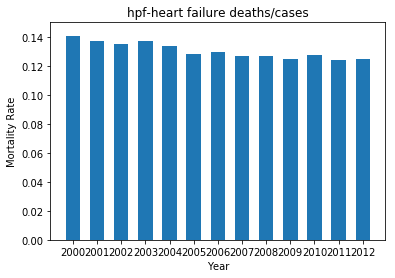

In [17]:
# Mortality rate per disease separated by year
for i in cases.columns[2:-1]:
    j = deaths[i].values/cases[i].values
    ticks = range(1, len(cases["year"]) + 1)
    height = j
    tick_label = cases["year"].values
    plt.bar(ticks, height, tick_label=tick_label, width=0.6)
    plt.title(i + " deaths/cases")
    plt.ylabel("Mortality Rate")
    plt.xlabel("Year")
    plt.ylim([0,0.15])
    plt.show()

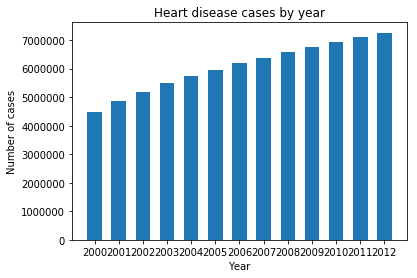

In [18]:
#survival = cases["ipb-ischemic heart disease"].values-deaths["ipb-ischemic heart disease"].values
#print(survival)

#df["Total"] = df.iloc[:, 4:,].sum(axis=1)
#print(cases)


ticks = range(1, len(cases["year"]) + 1)
height = cases["Total"].values
tick_label = cases["year"].values
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Heart disease cases by year")
plt.ylabel("Number of cases")
plt.xlabel("Year")
plt.show()

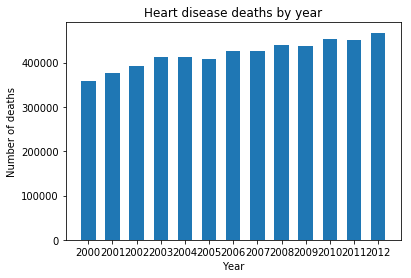

In [19]:
ticks = range(1, len(deaths["year"]) + 1)
height = deaths["Total"].values
tick_label = deaths["year"].values
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Heart disease deaths by year")
plt.ylabel("Number of deaths")
plt.xlabel("Year")
plt.show()

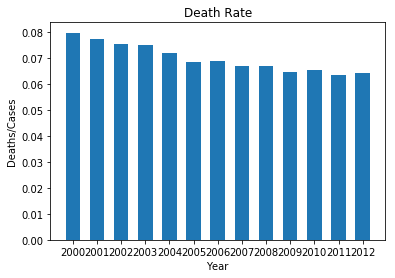

In [20]:
ticks = range(1, len(deaths["year"]) + 1)
height = deaths["Total"].values/cases["Total"].values
tick_label = deaths["year"].values
plt.bar(ticks, height, tick_label=tick_label, width=0.6)
plt.title("Death Rate")
plt.ylabel("Deaths/Cases")
plt.xlabel("Year")
plt.show()